(1, 188, 250, 3)
(1, 1, 188, 250, 3)


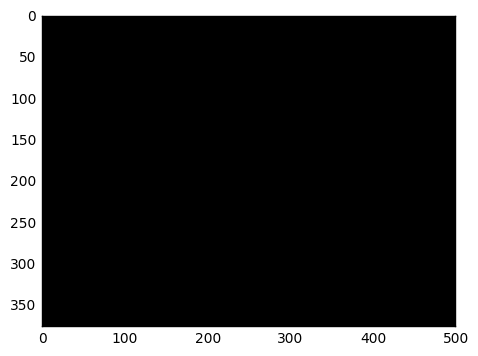

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

image = np.float32(cv2.imread('../data/VOC2012/VOC2012_SEG_AUG/images/2007_000346.png'))

x = tf.placeholder(tf.float32, shape=(1, None, None, None))

output, argmax = tf.nn.max_pool_with_argmax(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool1')

def unravel_index(indices, shape):
    indices = tf.expand_dims(indices, 0)
    shape = tf.expand_dims(shape, 0)

    strides = tf.to_int64(tf.cumprod(shape, reverse=True))
    strides_shifted = tf.to_int64(tf.cumprod(shape, exclusive=True, reverse=True))
    return (indices // strides_shifted) % strides

pool_map = unravel_index(argmax, [375, 500, 3]) 

session = tf.InteractiveSession()
session.run(tf.initialize_all_variables())

pool_map_tf = np.asarray(pool_map.eval(feed_dict={x: [image]}))
print(argmax.eval(feed_dict={x: [image]}).shape)

session.close()

unraveled_pool_map_tf = np.zeros_like(image)
#print(unraveled_pool_map_tf.shape)
print(pool_map_tf.shape)
#print(pool_map_tf.shape[1])
#print(pool_map_tf.shape[2])

for y in range(pool_map_tf.shape[1]):
    for x in range(pool_map_tf.shape[2]):
        unraveled_pool_map_tf[pool_map_tf[0,y,x,0], pool_map_tf[0,y,x,1]] = 255
        
plt.figure()
plt.imshow(unraveled_pool_map_tf)
plt.show()

(375, 500, 3)
[[[[[  1   1   1]
    [  1   1   1]
    [  1   1   1]
    ..., 
    [  1   1   1]
    [  1   1   1]
    [  1   1   0]]

   [[  3   3   3]
    [  2   2   2]
    [  2   2   2]
    ..., 
    [  2   2   2]
    [  2   3   2]
    [  3   3   3]]

   [[  4   4   4]
    [  4   4   4]
    [  4   4   4]
    ..., 
    [  4   4   4]
    [  5   4   5]
    [  5   4   4]]

   ..., 
   [[371 371 371]
    [370 371 371]
    [371 371 371]
    ..., 
    [371 371 371]
    [370 370 370]
    [370 370 370]]

   [[373 373 373]
    [373 373 373]
    [373 373 373]
    ..., 
    [372 372 372]
    [373 373 373]
    [373 373 373]]

   [[374 374 374]
    [374 374 374]
    [374 374 374]
    ..., 
    [374 374 374]
    [374 374 374]
    [374 374 374]]]]



 [[[[  1   1   1]
    [  2   2   2]
    [  4   4   4]
    ..., 
    [494 494 494]
    [496 496 496]
    [498 498 498]]

   [[  1   1   1]
    [  3   3   2]
    [  5   5   5]
    ..., 
    [494 494 494]
    [496 497 496]
    [498 498 498]]

   [[  0   0 

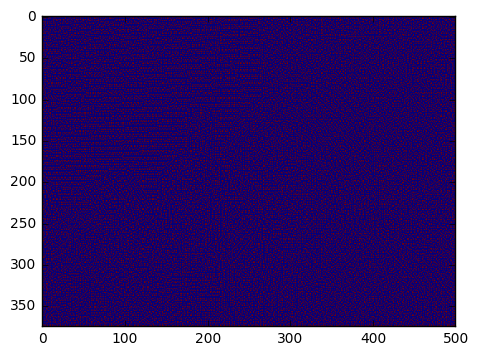

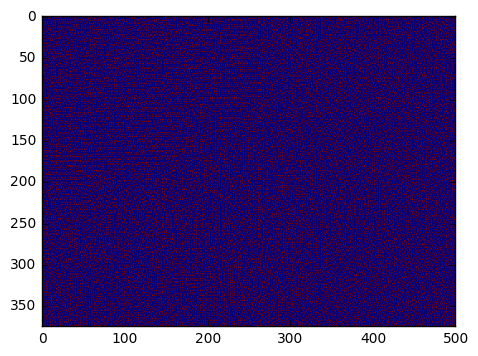

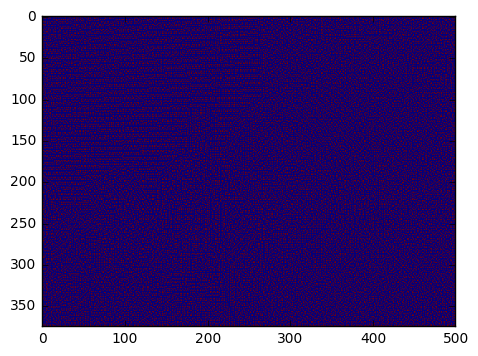

ValueError: operands could not be broadcast together with shapes (375,500,3) (375,500) 

In [23]:
x_2 = tf.placeholder(tf.float32, shape=(1, None, None, None))

output = tf.nn.max_pool_with_argmax(x_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool1')

image = np.float32(cv2.imread('../data/VOC2012/VOC2012_SEG_AUG/images/2007_000346.png'))
print(image.shape)
session = tf.InteractiveSession()
session.run(tf.initialize_all_variables())

output, argmax = session.run(output, feed_dict={x_2: [image]})
pool_map = np.asarray(np.unravel_index(argmax, (375, 500, 3)))
print(pool_map)
print(argmax.shape)
session.close()

unraveled_pool_map = np.zeros_like(image)
#print(unraveled_pool_map.shape)
print(pool_map.shape)
#print(pool_map.shape[1])
#print(pool_map.shape[2])

for y in range(argmax.shape[1]):
    for x in range(argmax.shape[2]):
        for c in range(argmax.shape[3]):
            unraveled_pool_map[pool_map[0,0,y,x,c], pool_map[1,0,y,x,c], c] = 255
        
plt.figure()
plt.imshow(unraveled_pool_map[:,:,0])
plt.show()

plt.figure()
plt.imshow(unraveled_pool_map[:,:,1])
plt.show()

plt.figure()
plt.imshow(unraveled_pool_map[:,:,2])
plt.show()

plt.figure()
plt.imshow(unraveled_pool_map_tf-unraveled_pool_map[:,:,2])
plt.show()

In [17]:
print(argmax.shape)
#print(argmax)

arr = np.array([[[[1, 2 ,3],[4, 5, 6],[7, 8, 9]],[[10, 11 ,12],[13, 14, 15],[16, 17, 18]]]])
#print(arr.shape)
#test = np.ravel_multi_index(arr, (19,19,19,13))
#test = np.expand_dims(test, -1)
#print(test.shape)
print(argmax)

(1, 188, 250, 3)
[[[[  1503   1504   1505]
   [  1506   1507   1508]
   [  1512   1513   1514]
   ..., 
   [  2982   2983   2984]
   [  2988   2989   2990]
   [  2994   2995   1496]]

  [[  4503   4504   4505]
   [  3009   3010   3008]
   [  3015   3016   3017]
   ..., 
   [  4482   4483   4484]
   [  4488   5992   4490]
   [  5994   5995   5996]]

  [[  6000   6001   6002]
   [  6009   6010   6011]
   [  6012   6013   6014]
   ..., 
   [  7485   7486   7487]
   [  8988   7492   8990]
   [  8994   7495   7496]]

  ..., 
  [[556500 556504 556502]
   [555009 556510 556511]
   [556515 556513 556517]
   ..., 
   [557982 557983 557984]
   [556491 556492 556493]
   [556494 556495 556496]]

  [[559503 559504 559505]
   [559506 559507 559508]
   [559512 559513 559514]
   ..., 
   [559485 559486 559484]
   [560988 560989 560990]
   [560994 560995 560996]]

  [[561000 561001 561002]
   [561006 561007 561008]
   [561012 561013 561014]
   ..., 
   [562482 562486 562484]
   [562488 562489 562490]
 